# Pima Indians Diabetes dataset
![](https://ankhoudary12.github.io/assets/diabetes_images/pima.jpeg)

The features (attributes) of the dataset:
*   Pregnancies (preg) : number of times pregnant
* Glucose (Plas): concentration of glucose in blood 2 hrs after ingestion of sugary drink (mmol/L)
*   Blood Pressure (pres): diastolic blood pressure (mm Hg)
*   Skin Thickness (skin): triceps skin fold thickness (mm)
*   Insulin (insu): concentration of insulin in blood 2 hrs after ingestion of sugary drink (μU/mL)
*   BMI (mass): body mass index (weight in kg/(height in m)^2)
*   Diabetes Pedigree Function (Predi): 0:1 value generated from familial diabetes history/risk
*   Age: age of patient

The output of the dataset:
* Label: 0 (no diabetes)  and 1 (Type II diabetes)


## อ่านไฟล์ pima_diab.csv จากนั้นแสดง 20 rows แรกของชุดข้อมูล
** ให้นักศึกษาโหลดไฟล์ชุดข้อมูล pima diabete จาก google classroom

In [7]:
import pandas as pd
df = pd.read_csv('pima_diab.csv')
df.head(20)


,Unnamed: 0,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,tested_positive
1,1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,tested_negative
2,2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,tested_positive
3,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,tested_negative
4,4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,tested_positive
5,5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,tested_negative
6,6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,tested_positive
7,7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,tested_negative
8,8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,tested_positive
9,9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,tested_positive


### แสดงจำนวน samples ของผู้ป่วยที่เป็นเบาหวาน (tested_positive) และไม่เป็นเบาหวาน (tested_negative) 

In [6]:
samples = df['class'].value_counts()
samples

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

### สร้างฟังก์ชั่น (function) เพื่อ clean ชุดข้อมูลนี้ ดังต่อไปนี้
3.1	ลบคอลัมน์ ‘unnamed:0’ 

3.2	เติม missing value ด้วยค่าเฉลี่ย (mean) ในแต่ละคอลัมน์ประเภท numeric และเติมด้วย most frequent value สำหรับคอลัมน์ประเภท categorical 

3.3	แทนค่าในคอลัมน์ class โดยแทน ‘tested_negative’ ด้วย 0 และ ‘tested_positive ด้วย 1    

โดยส่งค่ากลับเป็น dataframe ที่ถูก clean แล้ว 

In [ ]:

df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


## Feature Selection
สร้างฟังก์ชั่นเพื่อเลือก features ที่มีค่า correlation กับ class สูงสุด 4 อันดับแรก พร้อมนำมาสร้าง dataframe ใหม่ ตั้งชื่อ newdf  โดย feature ที่ถูกเลือกคือ 

In [ ]:


newdf

<ipython-input-14-683f87f89e98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['class'] = df['class']


,plas,pres,skin,insu,class
0,148.0,72.0,35.00000,155.548223,1
1,85.0,66.0,29.00000,155.548223,0
2,183.0,64.0,29.15342,155.548223,1
3,89.0,66.0,23.00000,94.000000,0
4,137.0,40.0,35.00000,168.000000,1
...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,0
764,122.0,70.0,27.00000,155.548223,0
765,121.0,72.0,23.00000,112.000000,0
766,126.0,60.0,29.15342,155.548223,1


จากผลลัพธ์ dataframe  ในข้อที่ 4 แบ่งข้อมูลสำหรับฝึกฝน (training data) ออกเป็น 70% และข้อมูลสำหรับทดสอบ (test data) 30% ให้แสดงรูปร่างมิติของข้อมูลฝึกฝน …………..…. และข้อมูลทดสอบ ………….… 

In [ ]:

print(X_train.shape, X_test.shape)

(614, 4) (154, 4)


สร้างโมเดล K-NN โดยกำหนดให้ k = 5 จากนั้นแสดงความแม่นยำบนชุดข้อมูลทดสอบ 

The accuracy of centroid-based model : 69.48%


ทำนาย label ของข้อมูลแถวที่ 3 บนชุดข้อมูลทดสอบ ลาเบลที่โมเดลทำนาย 

In [ ]:
                                                             ## pick up the 3rd sample in X_test
print('the feature vector of the 2nd sample : ', test_data)

                                                             ## predict label for the 2nd sample in X_test
print('the predicted label {}'.format(label))

ValueError: cannot reshape array of size 4096 into shape (1,4)

### แสดงรายการของ training sample 5 อันดับแรก ที่อยู่ใกล้กับข้อมูลทดสอบแถวที่ 3

ใช้ GridSeaerchCV เพื่อหาค่า k ที่เหมาะสม โดยเริ่มจาก k = 1 ถึง 20 บนชุดข้อมูลฝึกฝน 

In [ ]:
from sklearn.model_selection import GridSearchCV       ## search best parameters
from sklearn.neighbors import KNeighborsClassifier



{'n_neighbors': 8}

แสดงความแม่นยำของโมเดลที่ใช้ค่า k ที่ได้รับจากข้อ 9  

The accuracy of centroid model : 74.68%


บันทึกโมเดลข้อ 9 ในรูปของไฟล์ pickle ตั้งชื่อ 'knn_best_model.pkl'

In [ ]:
import pickle


## Face Recognition task
The dataset contains 40 faces of 400 images.
![](https://www.kaggleusercontent.com/kf/19627012/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..4tPGNC3rrKy07hfHGaZtfQ.bGAzPNw0GEcTvpdvP1IFukNwRp0_Av0GH0lyg6j6uQ63Im4K8V_LaIoStrJ8HXJaiQ3pTK6F62VSl7VlWlE-WlhFHeFt3xa8E-XkZiPbv2vPM6PI-zUHf_vutJuuhDlXviXUAhguSuGTOEwfGC3uF9wiHFLS0UEJaRElFMesKBRptAEuQYFWSmh1lDpDYbJR9oHseND76mzDwweEdO2LxeKsC9I1lwMPt8Sspc4wcnXPOcXRGB0LmBU-9fPLeiQU7uNJYt0vYE_AeCvqEEIO_wXwnsz9qItgLvHKBzkoryxROegu-yQrL7iFrIKxjcAqEtRFaS_lQdY_rC9N9eG_nmwKqa1AGOMgVpvlQJu8EOA14TSXAqrsgpm-oJ3O1FhAvlYlMMvos7Jv3M0fnWTKSyMctTA5MvKmkpjKkonZMCCg-Q7vanMzRWzl2JlJBBK4exQ0X6z70hyPTxRBTj7KksCoq2vOpaFYMTSCIDjlbMN8q1vZFwMQMlfBAX9zN5vHCg-dhG5IQqTUFfblVIbfHvMsyYiA_zCdbvt01CSIpdKGT8zxPjKanFEzpURu2BTv9mDCMZ3ovmWTuSFFAB7dCBaoD_51AzTkdvCVvCYaopq7EGyU2kPGIDrxpi9rgvVkcx96xnjZPEO4CcS85QR8CCOO7NnMcadSRYHdJ6PpZ_4.H1ikrTdZcLZR3-LZQwYpzw/__results___files/__results___12_0.png)

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.images
Y = faces.target
print(X.shape, Y.shape)


(400, 64, 64) (400,)


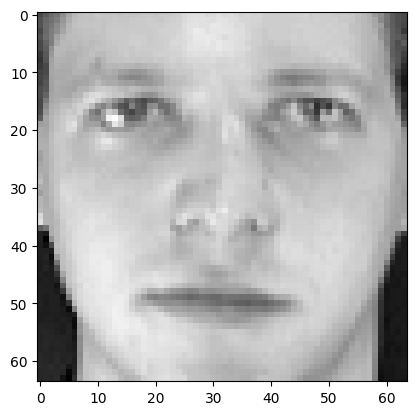

In [ ]:
import matplotlib.pyplot as plt     
plt.imshow(X[0], cmap='gray')              ### pick up the first face sample 
plt.show()

### แบ่งชุดข้อมูลนี้ออกเป็น 80% สำหรับข้อมูลฝึกฝน และ 20% สำหรับข้อมูลทดสอบ 

In [ ]:
from sklearn.model_selection import train_test_split



(320, 4096) (80, 4096)


สร้างโมเดล ชื่อ ‘model1’ โดยวิธี centroid พร้อมแสดงความแม่นยำบนชุดข้อมูลทดสอบ 

In [ ]:
from sklearn.neighbors import NearestCentroid


NearestCentroid()

บันทึกโมเดลในข้อ 14 ในรูปของไฟล์ pickle ตั้งชื่อ face_centroid.pkl 

In [ ]:
import pickle



สร้างโมเดล ชื่อ ‘model2’ โดยวิธี 1-NN พร้อมเปรียบเทียบผลลัพธ์บนชุดข้อมูลทดสอบกับโมเดล centroid  โดย

In [ ]:
import pickle


predicted labels :  [21 17 39 34 24 32  9 30 35 32 11  1 26 27 37  4  9 34 25 26]
actual labels :  [21 17 39 34 24 32  9 30 35 32 11  1 26 27 37  4  9 34 16 26]
